<a href="https://colab.research.google.com/github/ImperatorAvrelianvs/Generalized_Pell_equation_solver/blob/main/pell_analysis_statistical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

    D   N  num_classes  x  y
0  14 -65            0  0  0
1  69 -19            0  0  0
2  72 -58            0  0  0
3  78  -5            0  0  0
4  52 -44            0  0  0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7538 entries, 0 to 7537
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   D            7538 non-null   int64 
 1   N            7538 non-null   int64 
 2   num_classes  7538 non-null   int64 
 3   x            7538 non-null   object
 4   y            7538 non-null   object
dtypes: int64(3), object(2)
memory usage: 294.6+ KB
None
                 D            N  num_classes
count  7538.000000  7538.000000  7538.000000
mean     49.372380    -1.643672     2.390555
std      28.616995    56.357401     1.585317
min       2.000000  -100.000000     0.000000
25%      21.000000   -50.000000     1.000000
50%      53.000000     1.000000     2.000000
75%      71.000000    49.000000     3.000000
max      99.0000

/usr/local/lib/python3.11/dist-packages/scipy/stats/_continuous_distns.py:6921: RuntimeWarning: overflow encountered in divide
  return np.sum((1 + np.log(shifted/scale)/shape**2)/shifted)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


Normal fit: μ=2.39, σ=1.59
LogNorm fit: shape=234.28, loc=-0.00, scale=0.00


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7538.
  res = hypotest_fun_out(*samples, **kwds)


Shapiro–Wilk p-value: 0.0000
KS test (vs Normal) p-value: 0.0000
T-test D <=10 vs >10: t=-1.58, p=0.1142
                   sum_sq      df           F         PR(>F)
C(N_bucket)   2153.051509     3.0  322.054904  9.363896e-197
Residual     16789.155973  7534.0         NaN            NaN
Bootstrap 2.35–2.43 CI for mean num_classes
Explained variance ratios by component: [0.38371938 0.33963539]
                            OLS Regression Results                            
Dep. Variable:            num_classes   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     46.23
Date:                Mon, 14 Jul 2025   Prob (F-statistic):           1.18e-20
Time:                        16:46:39   Log-Likelihood:                -11284.
No. Observations:                6030   AIC:                         2.257e+04
Df Residuals:                    6027   BIC:       

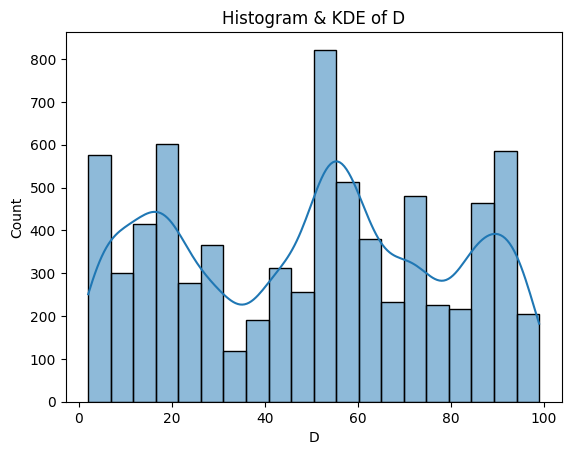

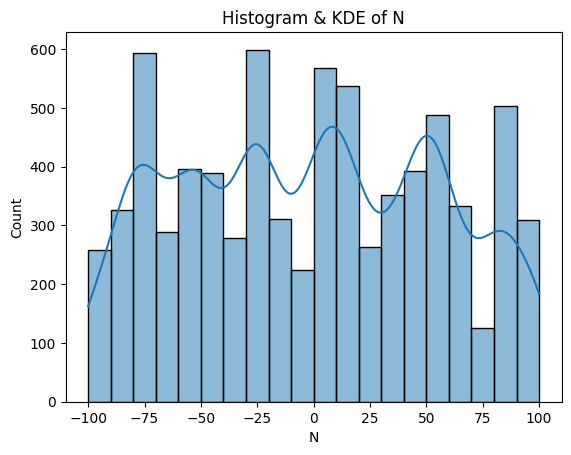

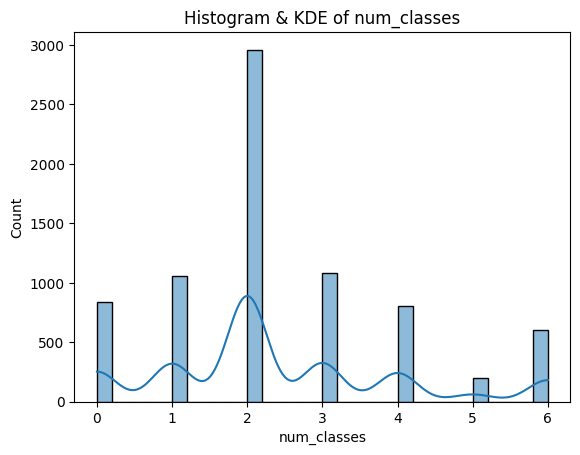

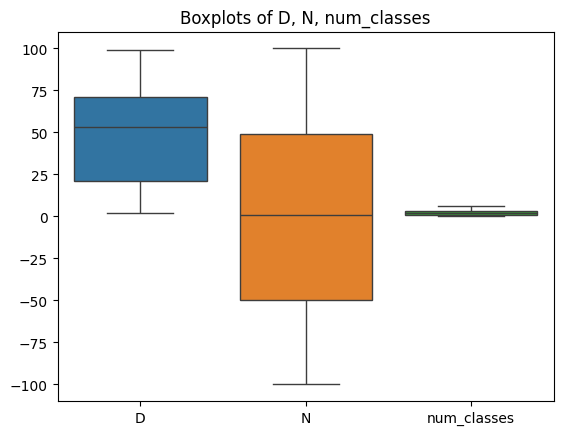

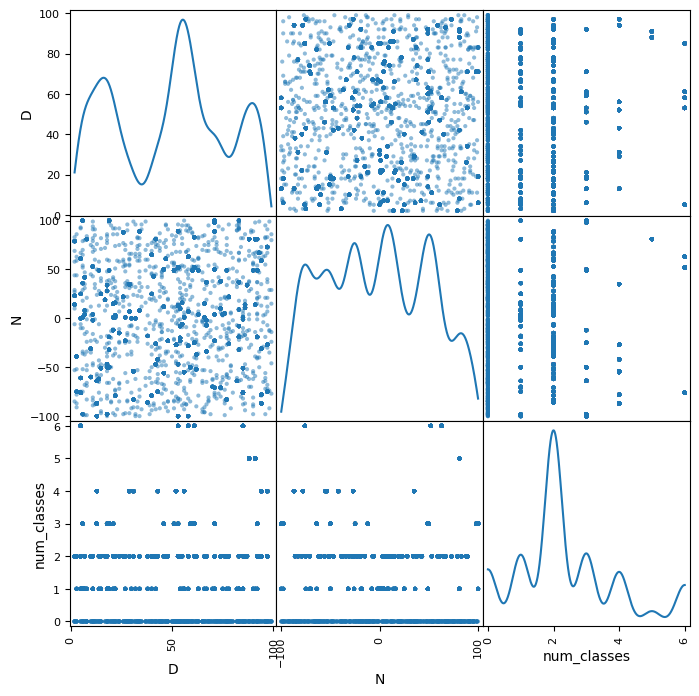

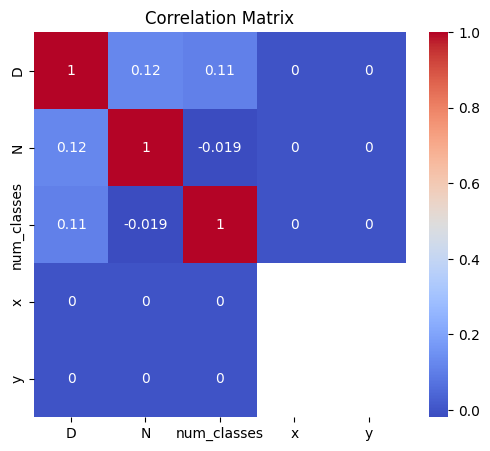

<Figure size 640x480 with 0 Axes>

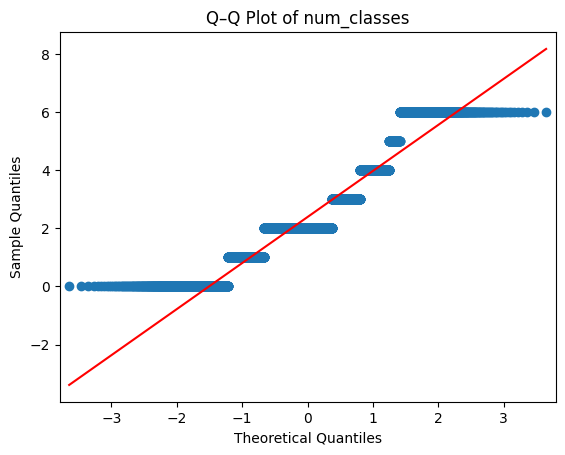

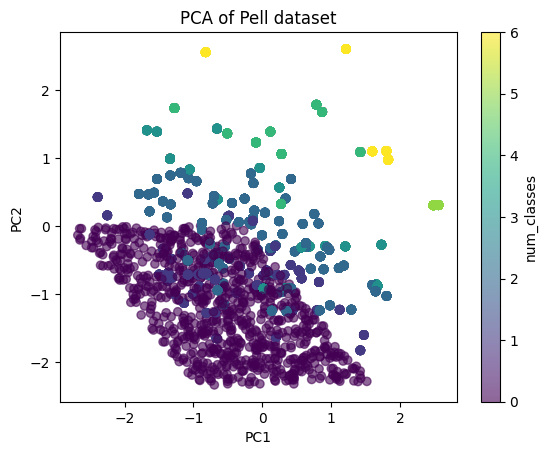

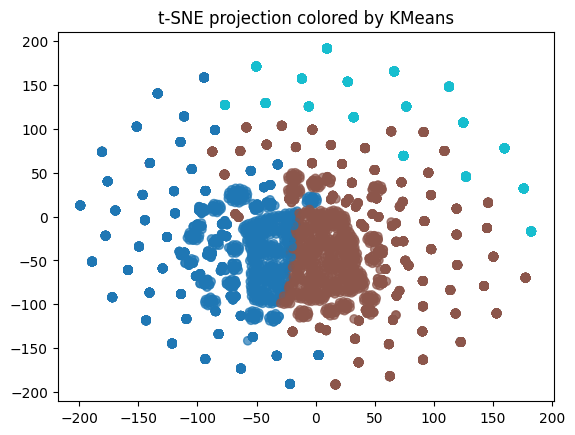

In [ ]:
# pell_analysis.py

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

# 1. Load data
df = pd.read_csv('/content/pell_dataset.csv')
print(df.head())
print(df.info())
print(df.describe())

# 2. Basic Univariate EDA
# ------------------------
# Histograms
for col in df.select_dtypes(include=np.number).columns:
    plt.figure()
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram & KDE of {col}')
    plt.savefig(f'hist_{col}.png')

# Boxplots & outliers
plt.figure()
sns.boxplot(data=df[['D','N','num_classes']])
plt.title('Boxplots of D, N, num_classes')
plt.savefig('boxplots.png')


# 3. Bivariate EDA
# ----------------
# Scatter matrix
pd.plotting.scatter_matrix(df[['D','N','num_classes']], figsize=(8,8), diagonal='kde')
plt.savefig('scatter_matrix.png')

# Correlation heatmap
corr = df.corr()
plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.savefig('corr_heatmap.png')


# 4. Distribution fitting & normality tests
# ------------------------------------------
# Fit normal/log-normal to num_classes
data = df['num_classes'].dropna()
mu, std = stats.norm.fit(data)
shape, loc, scale = stats.lognorm.fit(data)

print(f'Normal fit: μ={mu:.2f}, σ={std:.2f}')
print(f'LogNorm fit: shape={shape:.2f}, loc={loc:.2f}, scale={scale:.2f}')

# Q–Q plot
plt.figure()
sm.qqplot(data, line='s')
plt.title('Q–Q Plot of num_classes')
plt.savefig('qq_num_classes.png')

# Shapiro–Wilk test
shap_p = stats.shapiro(data)[1]
print(f"Shapiro–Wilk p-value: {shap_p:.4f}")

# KS test vs normal
ks_p = stats.kstest(data, 'norm', args=(mu, std))[1]
print(f"KS test (vs Normal) p-value: {ks_p:.4f}")


# 5. Hypothesis testing
# ---------------------
# Example: Are means of num_classes for D <= 10 vs D > 10 different?
group1 = df[df['D'] <= 10]['num_classes']
group2 = df[df['D'] > 10]['num_classes']
t_stat, p_val = stats.ttest_ind(group1, group2, equal_var=False)
print(f"T-test D <=10 vs >10: t={t_stat:.2f}, p={p_val:.4f}")

# One-way ANOVA across buckets of N size
df['N_bucket'] = pd.qcut(df['N'], q=4, labels=False)
anova = ols('num_classes ~ C(N_bucket)', data=df).fit()
print(sm.stats.anova_lm(anova, typ=2))


# 6. Bootstrapping
# ----------------
def bootstrap_mean_ci(x, n_boot=1000, ci=95):
    boots = np.random.choice(x, size=(n_boot, len(x)), replace=True)
    means = boots.mean(axis=1)
    lower, upper = np.percentile(means, [(100-ci)/2, 100-(100-ci)/2])
    return lower, upper

ci_lower, ci_upper = bootstrap_mean_ci(data.values)
print(f'Bootstrap {ci_lower:.2f}–{ci_upper:.2f} CI for mean num_classes')


# 7. Multivariate reduction & clustering
# ---------------------------------------
# Standardize features
from sklearn.preprocessing import StandardScaler
X = df[['D','N','num_classes']].values
X_scaled = StandardScaler().fit_transform(X)

# PCA
pca = PCA(n_components=2)
pcs = pca.fit_transform(X_scaled)
print('Explained variance ratios by component:', pca.explained_variance_ratio_)

# Plot PCA
plt.figure()
plt.scatter(pcs[:,0], pcs[:,1], c=df['num_classes'], cmap='viridis', alpha=0.6)
plt.colorbar(label='num_classes')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA of Pell dataset')
plt.savefig('pca.png')

# K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=0).fit(X_scaled)
df['kmeans_label'] = kmeans.labels_

# t-SNE for nonlinear embedding
tsne = TSNE(n_components=2, random_state=42)
tsne_proj = tsne.fit_transform(X_scaled)
plt.figure()
plt.scatter(tsne_proj[:,0], tsne_proj[:,1], c=df['kmeans_label'], cmap='tab10', alpha=0.7)
plt.title('t-SNE projection colored by KMeans')
plt.savefig('tsne.png')


# 8. Regression & Predictive Modeling
# -----------------------------------
# Goal: predict num_classes from D and N
y = df['num_classes']
X = df[['D','N']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# (a) OLS Regression
model = sm.OLS(y_train, sm.add_constant(X_train)).fit()
print(model.summary())

# Predict & evaluate
y_pred_ols = model.predict(sm.add_constant(X_test))
print("OLS RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_ols)))
print("OLS R2:", r2_score(y_test, y_pred_ols))

# (b) Random Forest Regressor
rf = RandomForestRegressor(n_estimators=200, random_state=0)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("RF RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("RF R2:", r2_score(y_test, y_pred_rf))
print("Feature importances:", rf.feature_importances_)

# Cross‐validation
cv_scores = cross_val_score(rf, X, y, cv=5, scoring='r2')
print("RF CV R2 scores:", cv_scores)
print("RF CV R2 mean:", cv_scores.mean())


# 9. Advanced: Mutual Information & Nonparametric Tests
# -----------------------------------------------------
from sklearn.feature_selection import mutual_info_regression
mi = mutual_info_regression(X, y)
print("Mutual information D, N vs num_classes:", mi)

# Nonparametric correlation (Spearman)
rho, spearman_p = stats.spearmanr(df['D'], df['num_classes'])
print(f"Spearman ρ between D and num_classes: {rho:.3f}, p={spearman_p:.4f}")
rho2, spearman_p2 = stats.spearmanr(df['N'], df['num_classes'])
print(f"Spearman ρ between N and num_classes: {rho2:.3f}, p={spearman_p2:.4f}")


# 10. (Optional) Generalized Linear Model
# ----------------------------------------
glm = sm.GLM(y_train, sm.add_constant(X_train), family=sm.families.Poisson()).fit()
print(glm.summary())

# compute McFadden's pseudo R²: 1 − (model deviance / null deviance)
pseudo_r2 = 1 - glm.deviance / glm.null_deviance
print(f"GLM pseudo R²: {pseudo_r2:.4f}")

# predictions & RMSE
y_pred_glm = glm.predict(sm.add_constant(X_test))
print("GLM RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_glm)))



if __name__ == '__main__':
    print("Analysis complete. Check generated plots for visual insights.")
